# `coSMicQC` in a nutshell

This notebook demonstrates various capabilities of `coSMicQC` using examples.

In [1]:
import pathlib

import pandas as pd

import cosmicqc

# set a path for the parquet-based dataset
# (in this case, CellProfiler SQLite data processed by CytoTable)
data_path = (
    "../../../tests/data/cytotable/NF1_cellpainting_data/"
    "Plate_2_with_image_data.parquet"
)

# set a context directory for images associated with the dataset
image_context_dir = pathlib.Path(data_path).parent / "Plate_2_images"
mask_context_dir = pathlib.Path(data_path).parent / "Plate_2_masks"

# create a cosmicqc CytoDataFrame (single-cell DataFrame)
scdf = cosmicqc.CytoDataFrame(
    data=data_path,
    data_context_dir=image_context_dir,
    data_mask_context_dir=mask_context_dir,
)

# display the dataframe
scdf

Metadata_ImageNumber Image_Metadata_Plate_x  \
0                        1                Plate_2   
1                        1                Plate_2   
2                        1                Plate_2   
3                        1                Plate_2   
4                        1                Plate_2   
...                    ...                    ...   
1709                   128                Plate_2   
1710                   128                Plate_2   
1711                   128                Plate_2   
1712                   128                Plate_2   
1713                   128                Plate_2   

      Metadata_number_of_singlecells Image_Metadata_Site_x  \
0                                 44                     1   
1                                 44                     1   
2                                 44                     1   
3                                 44                     1   
4                                 44                     1   
...                              ...                   ...   
1709                              59                     4   
1710                              59                     4   
1711                              59                     4   
1712                              59                     4   
1713                              59                     4   

     Image_Metadata_Well_x  Metadata_Cells_Number_Object_Number  \
0                      A12                                    1   
1                      A12                                    4   
2                      A12                                    7   
3                      A12                                    8   
4                      A12                                    9   
...                    ...                                  ...   
1709                    H7                                   10   
1710                    H7                                   11   
1711                    H7                                   12   
1712                    H7                                   13   
1713                    H7                                   14   

      Metadata_Cytoplasm_Parent_Cells  Metadata_Cytoplasm_Parent_Nuclei  \
0                                   1                                 2   
1                                   4                                 7   
2                                   7                                10   
3                                   8                                12   
4                                   9                                13   
...                               ...                               ...   
1709                               10                                14   
1710                               11                                15   
1711                               12                                16   
1712                               13                                17   
1713                               14                                20   

      Metadata_Nuclei_Number_Object_Number  Cytoplasm_AreaShape_Area  ...  \
0                                        2                   21024.0  ...   
1                                        7                   12754.0  ...   
2                                       10                   23976.0  ...   
3                                       12                   19374.0  ...   
4                                       13                   27385.0  ...   
...                                    ...                       ...  ...   
1709                                    14                   24942.0  ...   
1710                                    15                    6627.0  ...   
1711                                    16                   11216.0  ...   
1712                                    17                   15279.0  ...   
1713                                    20                    7106.0  .

In [2]:
# Identify which rows include outliers for a given threshold definition
# which references a column name and a z-score number which is considered
# the limit.
cosmicqc.analyze.identify_outliers(
    df=scdf,
    feature_thresholds={"Nuclei_AreaShape_Area": -1},
).sort_values()

0       False
1085    False
1083    False
1082    False
1080    False
        ...  
572      True
571      True
567      True
280      True
856      True
Name: cqc.custom.Z_Score.Nuclei_AreaShape_Area, Length: 1714, dtype: bool

In [3]:
# Show the number of outliers given a column name and a specified threshold
# via the `feature_thresholds` parameter and the `find_outliers` function.
cosmicqc.analyze.find_outliers(
    df=scdf,
    metadata_columns=["Metadata_ImageNumber", "Image_Metadata_Plate_x"],
    feature_thresholds={"Nuclei_AreaShape_Area": -1},
)

Number of outliers: 328 (19.14%)
Outliers Range:
Nuclei_AreaShape_Area Min: 734.0
Nuclei_AreaShape_Area Max: 1904.0


      Nuclei_AreaShape_Area  Metadata_ImageNumber Image_Metadata_Plate_x
23                    921.0                     2                Plate_2
28                    845.0                     2                Plate_2
29                   1024.0                     2                Plate_2
32                    787.0                     2                Plate_2
37                   1347.0                     2                Plate_2
...                     ...                   ...                    ...
1682                 1497.0                   127                Plate_2
1689                 1794.0                   127                Plate_2
1692                 1732.0                   127                Plate_2
1699                 1149.0                   127                Plate_2
1707                 1594.0                   128                Plate_2

[328 rows x 3 columns]

In [4]:
# create a labeled dataset which includes z-scores and whether those scores
# are interpreted as outliers or inliers. We use pre-defined threshold sets
# loaded from defaults (cosmicqc can accept user-defined thresholds too!).
labeled_scdf = cosmicqc.analyze.label_outliers(
    df=scdf,
    include_threshold_scores=True,
)

# show the dataframe rows with only the last 8 columns
# (added from the label_outliers function)
labeled_scdf.iloc[:, -8:]

cqc.small_and_low_formfactor_nuclei.Z_Score.Nuclei_AreaShape_Area  \
0                                              0.848820                   
1                                             -0.252521                   
2                                             -0.402491                   
3                                              0.329549                   
4                                              1.153446                   
...                                                 ...                   
1709                                           0.598557                   
1710                                          -0.716490                   
1711                                           1.187189                   
1712                                          -0.699619                   
1713                                          -0.990185                   

      cqc.small_and_low_formfactor_nuclei.Z_Score.Nuclei_AreaShape_FormFactor  \
0                                              0.219903                         
1                                             -1.280795                         
2                                             -0.325652                         
3                                             -0.268920                         
4                                              0.028845                         
...                                                 ...                         
1709                                          -0.280063                         
1710                                           0.068293                         
1711                                           0.833264                         
1712                                           0.534479                         
1713                                           0.356614                         

      cqc.small_and_low_formfactor_nuclei.is_outlier  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
1709                                           False   
1710                                           False   
1711                                           False   
1712                                           False   
1713                                           False   

      cqc.elongated_nuclei.Z_Score.Nuclei_AreaShape_Eccentricity  \
0                                              0.498274            
1                                             -0.659400            
2                                              0.819165            
3                                              0.961218            
4                                             -0.372891            
...                                                 ...            
1709                                           0.923075            
1710                                           0.650830            
1711                                          -0.752359            
1712                                          -0.747030            
1713                                          -1.309290            

      cqc.elongated_nuclei.is_outlier  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   
...                               ...   
1709                            False   
1710                            False   
1711                            False   
1712                            False   
1713                            False   

      cqc.large_nuclei.Z_Score.Nuclei_AreaShape_Area  \
0                                           0.848820   
1                                    

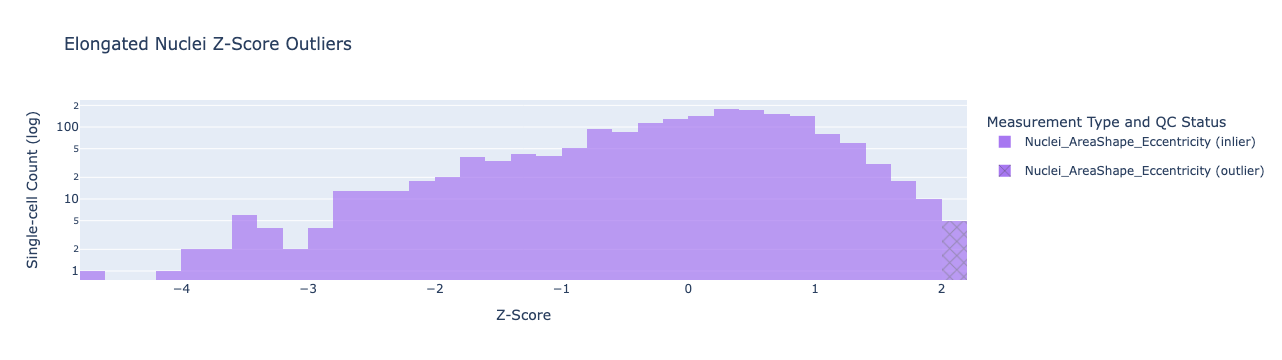

In [5]:
# show histogram reports on the outliers and inliers
# for each threshold set in the new columns
labeled_scdf.show_report();

Metadata_ImageNumber  Metadata_Cells_Number_Object_Number  \
699                     50                                    2   
1557                   113                                   10   
1677                   126                                    9   
457                     34                                    6   
882                     61                                    6   
...                    ...                                  ...   
570                     45                                   13   
569                     45                                   10   
568                     45                                    9   
567                     45                                    8   
1713                   128                                   14   

      cqc.large_nuclei.is_outlier      Image_FileName_GFP  \
699                          True  D12_01_2_2_GFP_001.tif   
1557                         True  H12_01_2_1_GFP_001.tif   
1677                         True   H7_01_2_2_GFP_001.tif   
457                          True  C12_01_2_2_GFP_001.tif   
882                          True   D7_01_2_1_GFP_001.tif   
...                           ...                     ...   
570                         False   C7_01_2_1_GFP_001.tif   
569                         False   C7_01_2_1_GFP_001.tif   
568                         False   C7_01_2_1_GFP_001.tif   
567                         False   C7_01_2_1_GFP_001.tif   
1713                        False   H7_01_2_4_GFP_001.tif   

          Image_FileName_RFP      Image_FileName_DAPI  
699   D12_01_3_2_RFP_001.tif  D12_01_1_2_DAPI_001.tif  
1557  H12_01_3_1_RFP_001.tif  H12_01_1_1_DAPI_001.tif  
1677   H7_01_3_2_RFP_001.tif   H7_01_1_2_DAPI_001.tif  
457   C12_01_3_2_RFP_001.tif  C12_01_1_2_DAPI_001.tif  
882    D7_01_3_1_RFP_001.tif   D7_01_1_1_DAPI_001.tif  
...                      ...                      ...  
570    C7_01_3_1_RFP_001.tif   C7_01_1_1_DAPI_001.tif  
569    C7_01_3_1_RFP_001.tif   C7_01_1_1_DAPI_001.tif  
568    C7_01_3_1_RFP_001.tif   C7_01_1_1_DAPI_001.tif  
567    C7_01_3_1_RFP_001.tif   C7_01_1_1_DAPI_001.tif  
1713   H7_01_3_4_RFP_001.tif   H7_01_1_4_DAPI_001.tif  

[1714 rows x 6 columns]
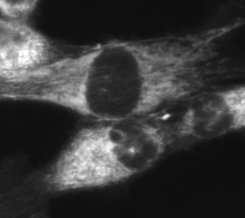
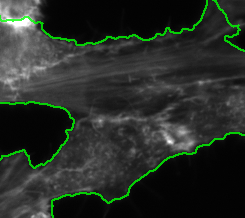
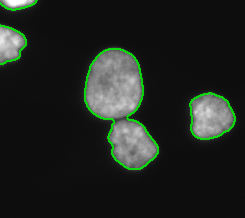
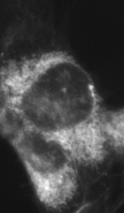
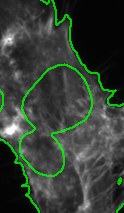
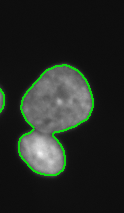
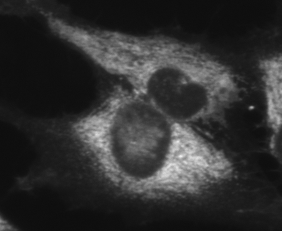
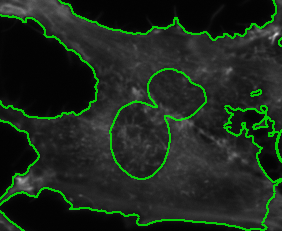
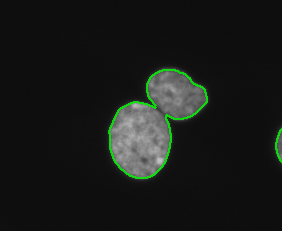
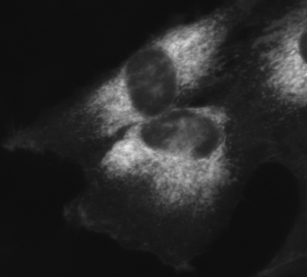
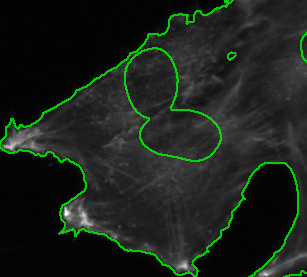
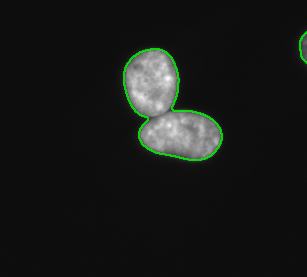
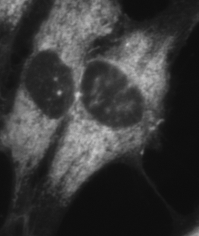
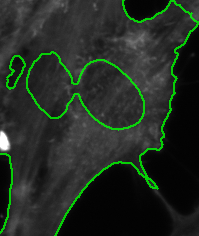
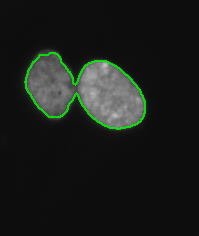
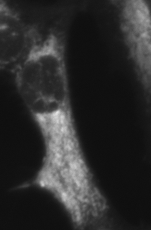
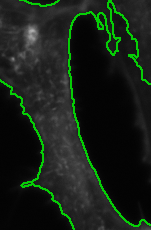
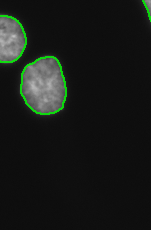
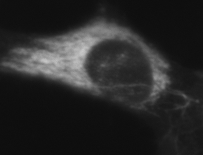
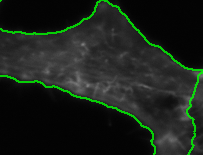
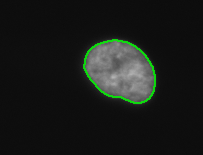
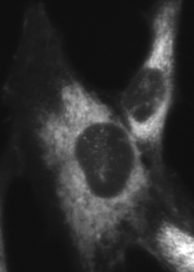
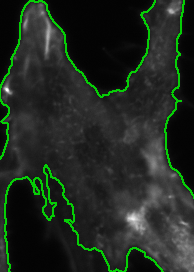
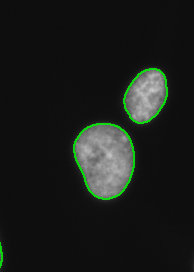
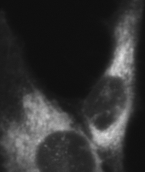
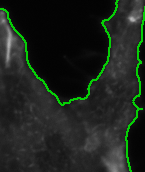
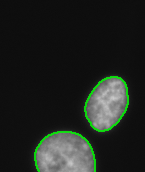
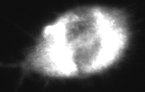
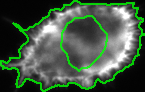
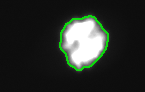

In [6]:
# show cropped images through CytoDataFrame from the dataset to help analyze outliers
labeled_scdf.sort_values(by="cqc.large_nuclei.is_outlier", ascending=False)[
    [
        "Metadata_ImageNumber",
        "Metadata_Cells_Number_Object_Number",
        "cqc.large_nuclei.is_outlier",
        "Image_FileName_GFP",
        "Image_FileName_RFP",
        "Image_FileName_DAPI",
    ]
]

In [7]:
# One can convert from cosmicqc.CytoDataFrame to pd.DataFrame's
# (when or if needed!)
df = pd.DataFrame(scdf)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


Metadata_ImageNumber Image_Metadata_Plate_x  \
0                        1                Plate_2   
1                        1                Plate_2   
2                        1                Plate_2   
3                        1                Plate_2   
4                        1                Plate_2   
...                    ...                    ...   
1709                   128                Plate_2   
1710                   128                Plate_2   
1711                   128                Plate_2   
1712                   128                Plate_2   
1713                   128                Plate_2   

      Metadata_number_of_singlecells Image_Metadata_Site_x  \
0                                 44                     1   
1                                 44                     1   
2                                 44                     1   
3                                 44                     1   
4                                 44                     1   
...                              ...                   ...   
1709                              59                     4   
1710                              59                     4   
1711                              59                     4   
1712                              59                     4   
1713                              59                     4   

     Image_Metadata_Well_x  Metadata_Cells_Number_Object_Number  \
0                      A12                                    1   
1                      A12                                    4   
2                      A12                                    7   
3                      A12                                    8   
4                      A12                                    9   
...                    ...                                  ...   
1709                    H7                                   10   
1710                    H7                                   11   
1711                    H7                                   12   
1712                    H7                                   13   
1713                    H7                                   14   

      Metadata_Cytoplasm_Parent_Cells  Metadata_Cytoplasm_Parent_Nuclei  \
0                                   1                                 2   
1                                   4                                 7   
2                                   7                                10   
3                                   8                                12   
4                                   9                                13   
...                               ...                               ...   
1709                               10                                14   
1710                               11                                15   
1711                               12                                16   
1712                               13                                17   
1713                               14                                20   

      Metadata_Nuclei_Number_Object_Number  Cytoplasm_AreaShape_Area  ...  \
0                                        2                   21024.0  ...   
1                                        7                   12754.0  ...   
2                                       10                   23976.0  ...   
3                                       12                   19374.0  ...   
4                                       13                   27385.0  ...   
...                                    ...                       ...  ...   
1709                                    14                   24942.0  ...   
1710                                    15                    6627.0  ...   
1711                                    16                   11216.0  ...   
1712                                    17                   15279.0  ...   
1713                                    20                    7106.0  .